In [1]:
import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import numpy as np
import pandas as pd
from scipy.misc import derivative
import scipy.integrate as intg
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_folder = 'Data_SNIa_LSST/larger/'
df_data = pd.read_csv(data_folder+'hubble_diagram.txt', skiprows=5, sep=' ')
# Np = len(dfp.values)
# N s=  len(dfs.values)
df_data.head()

,CID,IDSURVEY,zCMB,zHEL,MU,MUERR,MUERR_VPEC,MUERR_SYS
0,SN:2521,50,0.01988,0.01988,34.84680,0.1320,0.0736,0.00796
1,SN:57482,50,0.02321,0.02321,34.89863,0.1551,0.0631,0.00720
2,SN:52921,50,0.02364,0.02364,35.28915,0.1243,0.0620,0.00771
3,SN:21365,50,0.02470,0.02470,35.11988,0.1444,0.0594,0.00717
4,SN:117311,50,0.02471,0.02471,35.19347,0.1232,0.0593,0.00702


In [3]:
len(df_data)


5785

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


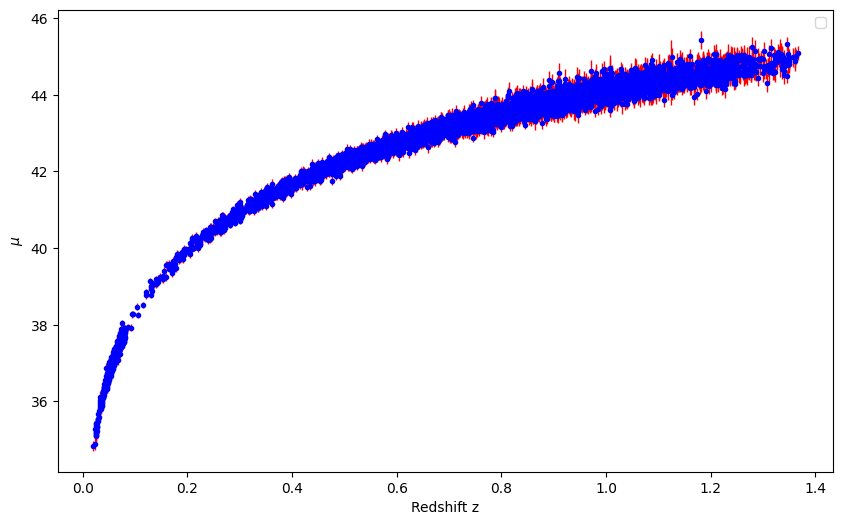

In [4]:
fig = plt.figure(figsize=(10, 6))
plt.errorbar(df_data['zCMB'].values, df_data['MU'].values, yerr=df_data['MUERR'].values, fmt='.', color='b', elinewidth=1, ecolor='red')
plt.ylabel("$\mu$")
plt.xlabel("Redshift z")
plt.legend()

In [5]:
df_data = df_data[['zCMB', 'zHEL', 'MU', 'MUERR', 'MUERR_SYS']]

In [6]:
len(df_data)

5785

In [7]:
df_data.head()

,zCMB,zHEL,MU,MUERR,MUERR_SYS
0,0.01988,0.01988,34.84680,0.1320,0.00796
1,0.02321,0.02321,34.89863,0.1551,0.00720
2,0.02364,0.02364,35.28915,0.1243,0.00771
3,0.02470,0.02470,35.11988,0.1444,0.00717
4,0.02471,0.02471,35.19347,0.1232,0.00702


In [8]:
cov = df_data['MUERR_SYS'].values

In [9]:
np.shape(cov)

(5785,)

In [10]:
cov

array([0.00796, 0.0072 , 0.00771, ..., 0.042  , 0.02598, 0.01698])

In [11]:
np.savetxt('Data_SNIa_LSST/larger/large_cov.dat', cov, fmt='%.8f')

In [12]:
np.savetxt('Data_SNIa_LSST/larger/lsst_large_hubble_diagram.txt', df_data.values, fmt='%.8f')

In [13]:
# cov2 = cov.reshape(len(cov), len(cov))

In [14]:
# cov2 == cov